#  Explore Data

The goal of this section is to get comfortable with our data. We check how each variable relates to the churn rate. For categorical features, we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable. 

## Understanding the Churn Distribution
Let's known our target feature

In [13]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# if we want to see all columns, we set this parametr on
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# use custom function
%run -i 'py/dataframecheck.py'

# set style for plots
sns.set(style="whitegrid")

In [2]:
# read dataset
df = pd.read_csv("data/clean_churn.csv")
df.head(3)

gender  seniorcitizen partner dependents  tenure phoneservice     multiplelines internetservice onlinesecurity onlinebackup deviceprotection techsupport streamingtv streamingmovies        contract paperlessbilling     paymentmethod  monthlycharges  totalcharges churn
0  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes  Electronic check           29.85         29.85    No
1    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No      Mailed check           56.95       1889.50    No
2    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes      Mailed check           53.85        108.15   Yes

In [3]:
df.shape

(7032, 20)

In [3]:
# define caterogical columns and numeric columns
cat_cols=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numeric_cols=['tenure','monthlycharges', 'totalcharges']
print('Number of Categorical Features =', len(cat_cols))
print('Number of Numerical Features =', len(numeric_cols))

Number of Categorical Features = 16
Number of Numerical Features = 3


In [4]:
print(f"Churn (Target) Percentage Dustribution ", "\n",round(df['churn'].value_counts(normalize=True) * 100,2))

Churn (Target) Percentage Dustribution  
 No     73.42
Yes    26.58
Name: churn, dtype: float64


In our data, almost **74%** of the customers do not churn. Clearly the data is **skewed** as company would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.

Text(0.5, 1.0, 'Churn (Target) Dustribution ')

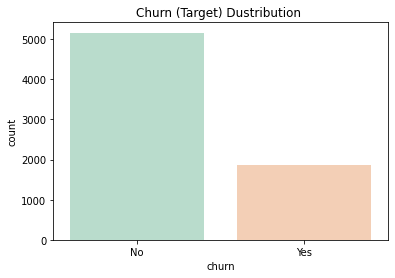

In [5]:
sns.countplot(x='churn', data=df, 
            palette = sns.color_palette("Pastel2", 8), tick_label  = True).set_title("Churn (Target) Dustribution ")

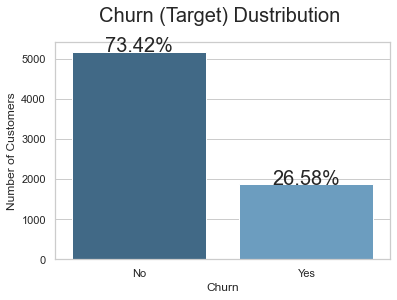

In [14]:
sns.set(style="whitegrid")
# one person per row
total = float(len(df))  
ax = sns.countplot(x='churn', data=df,  palette="Blues_d")
ax.set(xlabel='Churn',ylabel='Number of Customers')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total*100))+ '%',
            ha="center",fontsize=20) 
plt.title(("Churn (Target) Dustribution "), fontsize = 20, pad =20)
plt.show()

In [17]:
#Let's visualize the churn ratio for senior citizens
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color='time')
fig.show() 

plt.bar('seniorcitizen',df,barmode='stack',width=600,height=400,color1='orange',color2='green')

TypeError: bar() got multiple values for argument 'height'

In [9]:
def print_cat(df, col):
    gb = df.groupby(col)["churn"].value_counts().to_frame().rename({"churn": "Number of Customers"}, axis = 1).reset_index()
    sns.barplot(x = col, y = "Number of Customers", data = gb, hue = "churn", 
            palette = sns.color_palette("Pastel2", 8)).set_title(f"{col} and relative Churn Rates in our population")
    plt.show()

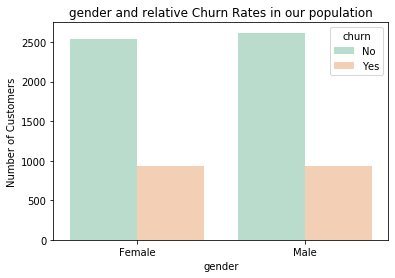

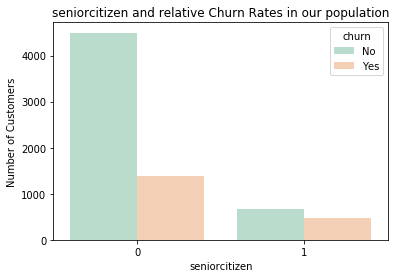

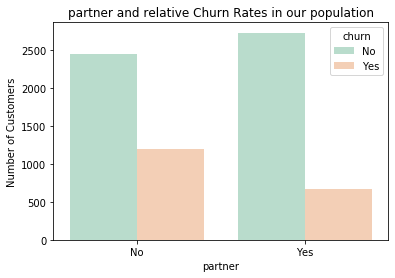

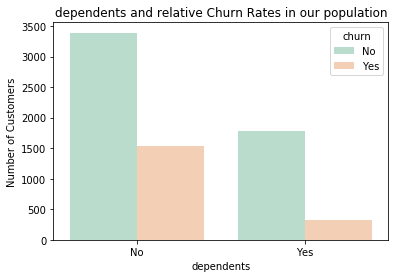

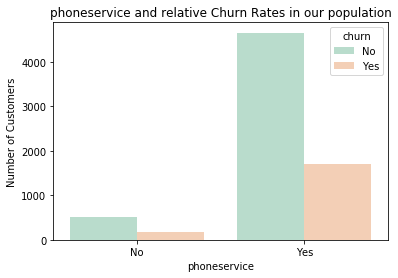

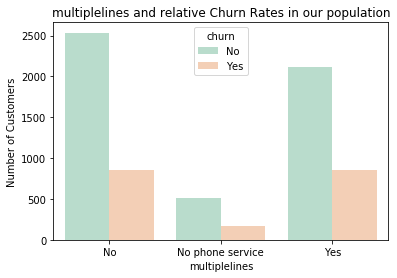

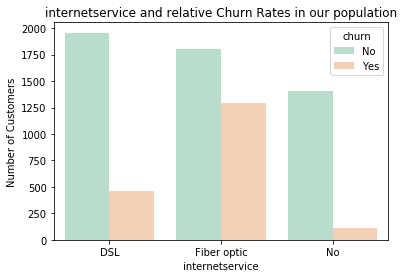

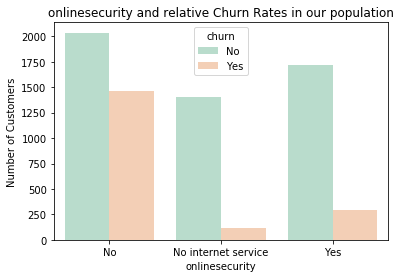

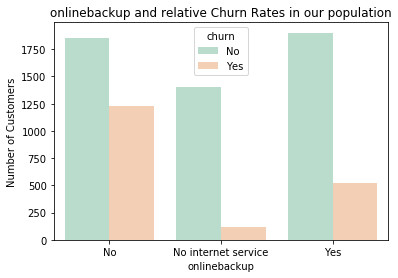

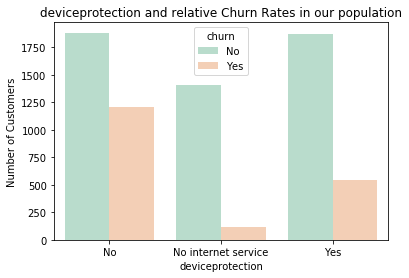

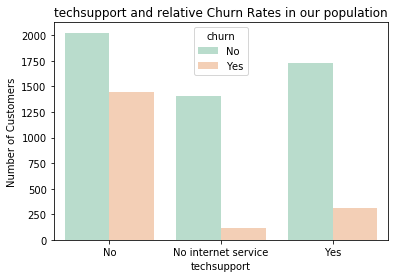

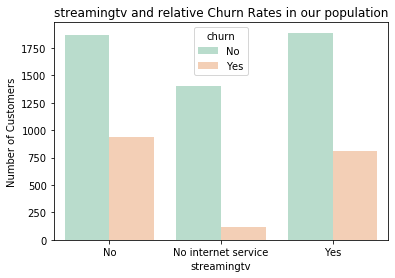

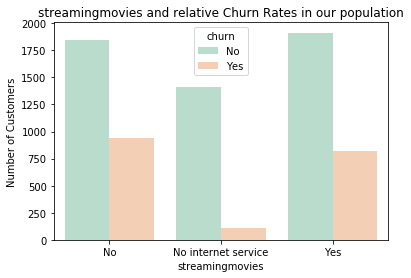

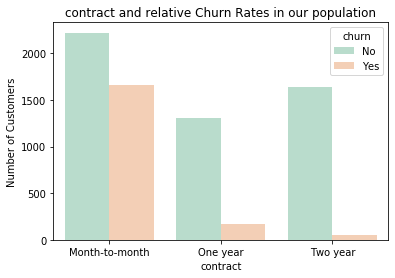

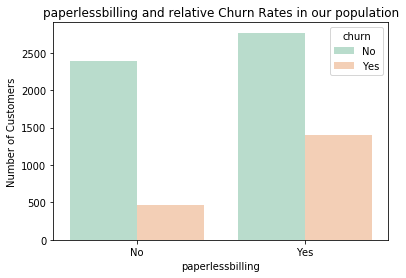

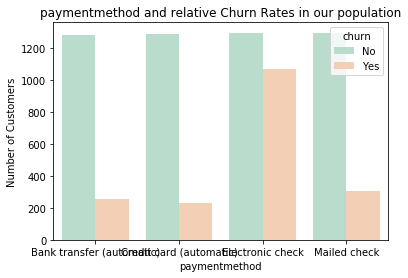

In [10]:
for col in cat_cols:
    print_cat(df,col)

-----
Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

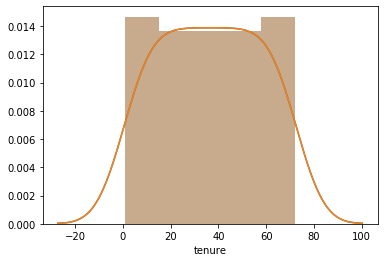

No handles with labels found to put in legend.


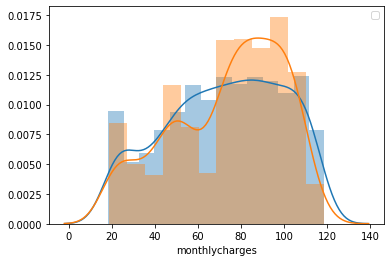

No handles with labels found to put in legend.


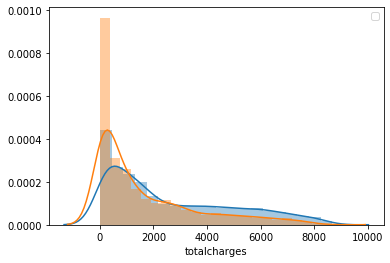

No handles with labels found to put in legend.


totalcharges churn  Number of Customers
0            18.80    No                    1
1            18.85    No                    1
3            18.90    No                    1
4            19.00    No                    1
5            19.05    No                    1
...            ...   ...                  ...
6691       8547.15    No                    1
6692       8564.75    No                    1
6693       8594.40    No                    1
6694       8670.10    No                    1
6695       8672.45    No                    1

[4965 rows x 3 columns]

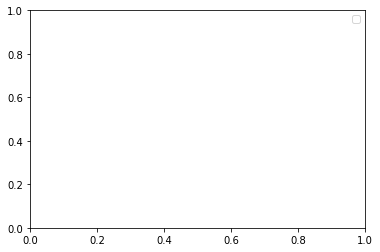

In [15]:
for col in numeric_cols: 
    gb = df.groupby(col)["churn"].value_counts().to_frame().rename({"churn": "Number of Customers"}, axis = 1).reset_index()
    gb1 = gb.loc[gb["churn"]=="No"]
    gb2 = gb.loc[gb["churn"]=="Yes"]
    sns.distplot(gb1[col])
    sns.distplot(gb2[col])
    plt.show()
    plt.legend()
gb1  

In [5]:
#
quant_col = df[['tenure', 'monthlycharges', 'totalcharges']]

# 
quant_col.describe()

tenure  monthlycharges  totalcharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

<Figure size 1080x720 with 0 Axes>

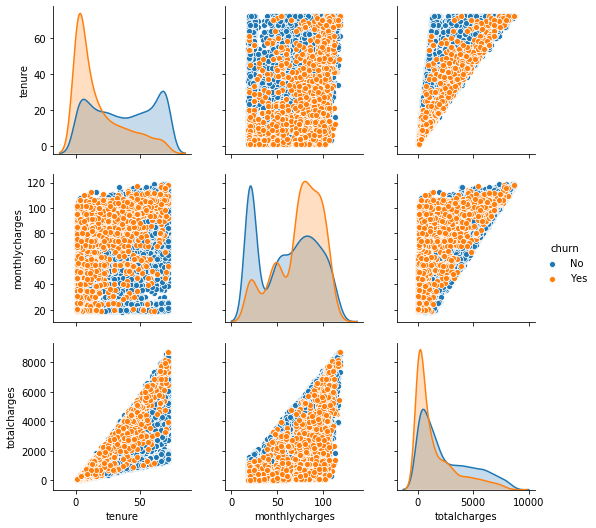

In [9]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=['tenure', 'monthlycharges', 'totalcharges'], 
             hue='churn', diag_kind='kde')
plt.show()

Men and women are evenly distributed in our sample, and show the same proportions of Churn.

<Figure size 1080x720 with 0 Axes>

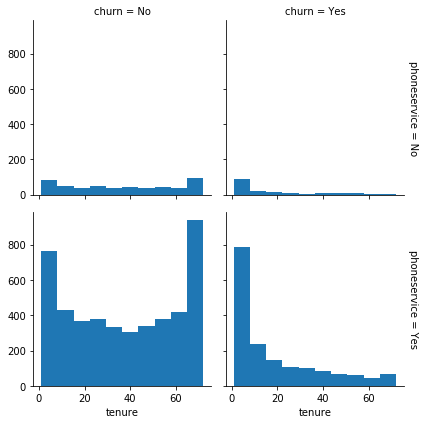

In [10]:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(df, col='churn', row='phoneservice', margin_titles=True)
g.map(plt.hist, 'tenure')
plt.show()

In [123]:
churn = df[df["churn"] == "Yes"]
not_churn = df[df["churn"] == "No"]

In [124]:
#labels
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.offline as py#visualization

#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#for all categorical columns plot histogram    
for i in numeric_cols :
    histogram(i)
    
    

In [129]:
categorical_features=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical_features=['tenure','monthlycharges', 'totalcharges']

for i in categorical_features:
    plot_pie(i)